In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path_10 = 'data【10月】生産性結果記入用紙_Ver.4.3 (1).xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_10 = pd.read_excel(file_path_10, sheet_name=sheet_name)
data_10.head()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-10-01 00:00:00,2024-10-02 00:00:00,2024-10-03 00:00:00,2024-10-04 00:00:00,2024-10-05 00:00:00,2024-10-06 00:00:00,2024-10-07 00:00:00,2024-10-08 00:00:00,...,2024-10-23 00:00:00,2024-10-24 00:00:00,2024-10-25 00:00:00,2024-10-26 00:00:00,2024-10-27 00:00:00,2024-10-28 00:00:00,2024-10-29 00:00:00,2024-10-30 00:00:00,2024-10-31 00:00:00,合計
2,A-PaLS,件数,0,1756,2125,2433,1490,0,2455,2921,...,2941,2498,2941,1249,0,2893,2264,297,170,57837
3,NaN,作業時間(分),0,4302,4740,7002,4620,0,5544,7026,...,8190,5871,7326,4485,0,6240,5694,771,486,154956
4,NaN,目標件数,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Excelデータの読み込み
file_path_11 = 'data【11月】生産性結果記入用紙_Ver.4.3.xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data_11 = pd.read_excel(file_path_11, sheet_name=sheet_name)
data_11.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-11-01 00:00:00,2024-11-02 00:00:00,2024-11-03 00:00:00,2024-11-04 00:00:00,2024-11-05 00:00:00,2024-11-06 00:00:00,2024-11-07 00:00:00,2024-11-08 00:00:00,...,2024-11-23 00:00:00,2024-11-24 00:00:00,2024-11-25 00:00:00,2024-11-26 00:00:00,2024-11-27 00:00:00,2024-11-28 00:00:00,2024-11-29 00:00:00,2024-11-30 00:00:00,2024-12-01 00:00:00,合計
2,A-PaLS,件数,0,2199,0,0,1172,1894,2912,2794,...,1741,1332,2867,3622,3856,2360,1597,1582,0,59330
3,NaN,作業時間(分),0,5262,0,0,2070,3567,8088,7374,...,7551,4302,9009,7893,9682,8725,7200,4905,0,172247
4,NaN,目標件数,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# 行列を逆にする
data_10 = data_10.T
# 1行目を列名にする
data_10.columns = data_10.iloc[1]
# 0,1行目を削除
data_10 = data_10.drop(data_10.index[[0, 1]])
data_10.head()

Unnamed: 1,NaN,項目,件数,作業時間(分),目標件数,作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-10-01 00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-10-02 00:00:00,1756,4302,NaN,7,5,12,4,358.5,439,NaN,NaN,NaN,2,2.449886,177.559275
Unnamed: 4,NaN,2024-10-03 00:00:00,2125,4740,NaN,6,6,12,4,395,531.25,NaN,NaN,NaN,3,2.230588,195.015823
Unnamed: 5,NaN,2024-10-04 00:00:00,2433,7002,NaN,12,6,18,6,389,405.5,NaN,NaN,NaN,4,2.877928,151.150386
Unnamed: 6,NaN,2024-10-05 00:00:00,1490,4620,NaN,13,2,15,5,308,298,NaN,NaN,NaN,5,3.100671,140.292208


In [146]:
# 行列を逆にする
data_11 = data_11.T
# 1行目を列名にする
data_11.columns = data_11.iloc[1]
# 0,1行目を削除
data_11 = data_11.drop(data_11.index[[0, 1]])
data_11.head()

Unnamed: 1,NaN,項目,件数,作業時間(分),目標件数,作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,予測,買い合わせ,NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-11-01 00:00:00,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
Unnamed: 3,NaN,2024-11-02 00:00:00,2199,5262,NaN,13,5,18,6,292.333333,366.5,NaN,NaN,NaN,2,2.392906,181.787343
Unnamed: 4,NaN,2024-11-03 00:00:00,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0
Unnamed: 5,NaN,2024-11-04 00:00:00,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0
Unnamed: 6,NaN,2024-11-05 00:00:00,1172,2070,NaN,NaN,6,6,2,345,586,NaN,NaN,NaN,5,1.766212,246.289855


In [147]:
# 欠損値を探す
data_10.isnull().sum()

Unnamed: 1
NaN            32
項目              0
件数              0
作業時間(分)         0
目標件数           32
作業人数            4
リーダー人数          4
合計作業人数          2
ライン数            5
1人あたりの作業時間      5
1本あたりの平均作業数     5
予測             32
買い合わせ          32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [148]:
# 欠損値を探す
data_11.isnull().sum()

Unnamed: 1
NaN            32
項目              0
件数              0
作業時間(分)         0
目標件数           32
作業人数            7
リーダー人数          6
合計作業人数          1
ライン数            7
1人あたりの作業時間      7
1本あたりの平均作業数     7
予測             32
買い合わせ          32
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [149]:
data_10 = data_10.drop(data_10.columns[[0, 1, 4,11, 12, 13, 14]], axis=1)
data_10.head()

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
Unnamed: 3,1756,4302,7,5,12,4,358.5,439,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395,531.25,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389,405.5,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308,298,3.100671,140.292208


In [150]:
data_11 = data_11.drop(data_11.columns[[0, 1, 4, 11, 12, 13, 14]], axis=1)
data_11.head()

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0
Unnamed: 3,2199,5262,13,5,18,6,292.333333,366.5,2.392906,181.787343
Unnamed: 4,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0
Unnamed: 5,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0
Unnamed: 6,1172,2070,NaN,6,6,2,345,586,1.766212,246.289855


In [151]:
# NaNを全て0に変換
data_10 = data_10.fillna(0)
data_10.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_864/2710974917.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_10 = data_10.fillna(0)


Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.0,0.00,0.000000,0.000000
Unnamed: 3,1756,4302,7,5,12,4,358.5,439.00,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.0,531.25,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.0,405.50,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.0,298.00,3.100671,140.292208


In [152]:
# NaNを全て0に変換
data_11 = data_11.fillna(0)
data_11.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_864/3095783728.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_11 = data_11.fillna(0)


Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000
Unnamed: 3,2199,5262,13,5,18,6,292.333333,366.5,2.392906,181.787343
Unnamed: 4,0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000
Unnamed: 5,0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000
Unnamed: 6,1172,2070,0,6,6,2,345.000000,586.0,1.766212,246.289855


In [153]:
# 0列目のデータを表示
data_10.iloc[:, 0]
data_10

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,1756,4302,7,5,12,4,358.500000,439.000000,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.000000,531.250000,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.000000,405.500000,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.000000,298.000000,3.100671,140.292208
Unnamed: 7,0,0,11,4,15,5,0.000000,0.000000,0.000000,0.000000
Unnamed: 8,2455,5544,11,4,15,5,369.600000,491.000000,2.258248,192.627165
Unnamed: 9,2921,7026,18,3,21,7,334.571429,417.285714,2.405341,180.847566
Unnamed: 10,2138,7905,17,4,21,7,376.428571,305.428571,3.697381,117.650854
Unnamed: 11,1921,7332,17,4,21,7,349.142857,274.428571,3.816762,113.970949


In [154]:
# 0列目のデータを表示
data_11.iloc[:, 0]
data_11

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2199,5262,13,5,18,6,292.333333,366.500000,2.392906,181.787343
Unnamed: 4,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 5,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 6,1172,2070,0,6,6,2,345.000000,586.000000,1.766212,246.289855
Unnamed: 7,1894,3567,5,4,9,3,396.333333,631.333333,1.883316,230.975610
Unnamed: 8,2912,8088,17,4,21,7,385.142857,416.000000,2.777473,156.617211
Unnamed: 9,2794,7374,17,4,21,7,351.142857,399.142857,2.639227,164.820993
Unnamed: 10,3176,8283,13,2,15,5,552.200000,635.200000,2.607997,166.794640
Unnamed: 11,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [155]:
# Unnamed: 33と34を削除
data_10 = data_10.drop(data_10.index[[31]])
data_10


Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,1756,4302,7,5,12,4,358.500000,439.000000,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.000000,531.250000,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.000000,405.500000,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.000000,298.000000,3.100671,140.292208
Unnamed: 7,0,0,11,4,15,5,0.000000,0.000000,0.000000,0.000000
Unnamed: 8,2455,5544,11,4,15,5,369.600000,491.000000,2.258248,192.627165
Unnamed: 9,2921,7026,18,3,21,7,334.571429,417.285714,2.405341,180.847566
Unnamed: 10,2138,7905,17,4,21,7,376.428571,305.428571,3.697381,117.650854
Unnamed: 11,1921,7332,17,4,21,7,349.142857,274.428571,3.816762,113.970949


In [156]:
# Unnamed: 33と34を削除
data_11 = data_11.drop(data_11.index[[31]])
data_11

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 3,2199,5262,13,5,18,6,292.333333,366.500000,2.392906,181.787343
Unnamed: 4,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 5,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
Unnamed: 6,1172,2070,0,6,6,2,345.000000,586.000000,1.766212,246.289855
Unnamed: 7,1894,3567,5,4,9,3,396.333333,631.333333,1.883316,230.975610
Unnamed: 8,2912,8088,17,4,21,7,385.142857,416.000000,2.777473,156.617211
Unnamed: 9,2794,7374,17,4,21,7,351.142857,399.142857,2.639227,164.820993
Unnamed: 10,3176,8283,13,2,15,5,552.200000,635.200000,2.607997,166.794640
Unnamed: 11,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [157]:
# 「件数」数が0の行を削除
data_10 = data_10[data_10['件数'] != 0]
data_10

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 3,1756,4302,7,5,12,4,358.500000,439.000000,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.000000,531.250000,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.000000,405.500000,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.000000,298.000000,3.100671,140.292208
Unnamed: 8,2455,5544,11,4,15,5,369.600000,491.000000,2.258248,192.627165
Unnamed: 9,2921,7026,18,3,21,7,334.571429,417.285714,2.405341,180.847566
Unnamed: 10,2138,7905,17,4,21,7,376.428571,305.428571,3.697381,117.650854
Unnamed: 11,1921,7332,17,4,21,7,349.142857,274.428571,3.816762,113.970949
Unnamed: 12,2197,7491,17,4,21,7,356.714286,313.857143,3.409650,127.579095
Unnamed: 13,1978,5634,16,2,18,6,313.000000,329.666667,2.848332,152.720980


In [158]:
# 「件数」数が0の行を削除
data_11 = data_11[data_11['件数'] != 0]
data_11

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
Unnamed: 3,2199,5262,13,5,18,6,292.333333,366.500000,2.392906,181.787343
Unnamed: 6,1172,2070,0,6,6,2,345.000000,586.000000,1.766212,246.289855
Unnamed: 7,1894,3567,5,4,9,3,396.333333,631.333333,1.883316,230.975610
Unnamed: 8,2912,8088,17,4,21,7,385.142857,416.000000,2.777473,156.617211
Unnamed: 9,2794,7374,17,4,21,7,351.142857,399.142857,2.639227,164.820993
Unnamed: 10,3176,8283,13,2,15,5,552.200000,635.200000,2.607997,166.794640
Unnamed: 12,2679,7782,17,4,21,7,370.571429,382.714286,2.904815,149.751349
Unnamed: 13,2573,7017,18,3,21,7,334.142857,367.571429,2.727167,159.506199
Unnamed: 14,1739,6612,18,3,21,7,314.857143,248.428571,3.802185,114.407895
Unnamed: 15,2405,6405,17,4,21,7,305.000000,343.571429,2.663202,163.337237


In [159]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_10 = data_10.mean()
original_std_10 = data_10.std()
print(original_mean_10)
print(original_std_10)

Unnamed: 1
件数             2224.500000
作業時間(分)        5959.846154
作業人数             14.346154
リーダー人数            3.423077
合計作業人数           17.769231
ライン数              5.923077
1人あたりの作業時間      324.635165
1本あたりの平均作業数     364.729762
生産性(分/件)          2.742364
1日作業量/L         163.063399
dtype: float64
Unnamed: 1
件数              789.490633
作業時間(分)        1963.673979
作業人数              4.372114
リーダー人数            1.270372
合計作業人数            4.641618
ライン数              1.547206
1人あたりの作業時間       75.081417
1本あたりの平均作業数     102.975779
生産性(分/件)          0.482453
1日作業量/L          26.670397
dtype: float64


In [160]:
# データの標準偏差及び平均を取得（正規化解除に使用）
original_mean_11 = data_11.mean()
original_std_11 = data_11.std()
print(original_mean_11)
print(original_std_11)

Unnamed: 1
件数             2373.200000
作業時間(分)        6889.880000
作業人数             15.040000
リーダー人数            3.920000
合計作業人数           18.960000
ライン数              6.320000
1人あたりの作業時間      364.869905
1本あたりの平均作業数     388.880190
生産性(分/件)          2.967516
1日作業量/L         153.970934
dtype: float64
Unnamed: 1
件数              675.897058
作業時間(分)        1746.216704
作業人数              5.223983
リーダー人数            2.100000
合計作業人数            4.217819
ライン数              1.405940
1人あたりの作業時間       56.735581
1本あたりの平均作業数     114.433354
生産性(分/件)          0.667064
1日作業量/L          35.874718
dtype: float64


In [161]:
# 正規化(-1から1の範囲にする)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
data2_10 = scaler.fit_transform(data_10.iloc[:, 0:])
data2_10 = pd.DataFrame(data2_10, columns=data_10.columns[0:])
data2_10


Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
0,-0.060427,-0.009346,-0.692308,0.6,-0.2,-0.2,0.767516,0.586555,-0.611518,0.394771
1,0.158175,0.104361,-0.846154,1.0,-0.2,-0.2,1.000000,1.000000,-0.870066,0.777669
2,0.340640,0.691589,0.076923,1.0,0.6,0.6,0.961783,0.436415,-0.106865,-0.184492
3,-0.218009,0.073209,0.230769,-0.6,0.2,0.2,0.445860,-0.045378,0.155744,-0.422659
4,0.353673,0.313084,-0.076923,0.2,0.2,0.2,0.838217,0.819608,-0.837455,0.725276
5,0.629739,0.697819,1.000000,-0.2,1.0,1.0,0.615105,0.489236,-0.664036,0.466897
6,0.165877,0.926012,0.846154,0.2,1.0,1.0,0.881711,-0.012085,0.859252,-0.919284
7,0.037322,0.777259,0.846154,0.2,1.0,1.0,0.707916,-0.151020,1.000000,-1.000000
8,0.200829,0.818536,0.846154,0.2,1.0,1.0,0.756142,0.025690,0.520023,-0.701514
9,0.071090,0.336449,0.692308,-0.6,0.6,0.6,0.477707,0.096545,-0.141759,-0.150042


In [162]:
# 正規化(-1から1の範囲にする)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
data2_11 = scaler.fit_transform(data_11.iloc[:, 0:])
data2_11 = pd.DataFrame(data2_11, columns=data_11.columns[0:])
data2_11

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,ライン数,1人あたりの作業時間,1本あたりの平均作業数,生産性(分/件),1日作業量/L
0,-0.234724,-0.161324,0.444444,-0.454545,0.6,0.6,-1.000000,-0.320208,-0.542933,0.138844
1,-1.000000,-1.000000,-1.000000,-0.272727,-1.0,-1.0,-0.594664,0.758265,-1.000000,1.000000
2,-0.461997,-0.606674,-0.444444,-0.636364,-0.6,-0.6,-0.199590,0.981002,-0.914592,0.795544
3,0.296572,0.581188,0.888889,-0.636364,1.0,1.0,-0.285714,-0.076999,-0.262457,-0.197196
4,0.208644,0.393589,0.888889,-0.636364,1.0,1.0,-0.547387,-0.159823,-0.363283,-0.087670
5,0.493294,0.632422,0.444444,-1.000000,0.2,0.2,1.000000,1.000000,-0.386060,-0.061320
6,0.122951,0.500788,0.888889,-0.636364,1.0,1.0,-0.397860,-0.240542,-0.169582,-0.288860
7,0.043964,0.299790,1.000000,-0.818182,1.0,1.0,-0.678223,-0.314943,-0.299146,-0.158626
8,-0.577496,0.193379,1.000000,-0.818182,1.0,1.0,-0.826651,-0.900330,0.484897,-0.760722
9,-0.081222,0.138991,0.888889,-0.636364,1.0,1.0,-0.902514,-0.432863,-0.345798,-0.107479


In [163]:
# 目的変数と説明変数の設定
X_train = data2_10.drop(columns='件数')
y_train = data2_10['件数']
X_test = data2_11.drop(columns='件数')
y_test = data2_11['件数']

# ランダムフォレスト回帰モデルの構築
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.08879347042639144
R² Score: 0.635368892483413


In [164]:
# 3行目の件数を予測
X_new = X_test.iloc[0].values.reshape(1, -1)
y_new = model.predict(X_new)

# 正規化前の値に戻すためのMinMaxScaler
y_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler.fit(data_11[['件数']])

# 予測値を正規化前の値に戻す
y_new_original = y_scaler.inverse_transform([[y_new[0]]])

# 3行目の実際の値も正規化前に戻す
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))

print(f'Predicted (元の値): {y_new_original[0][0]:.2f}')
print(f'Actual (元の値): {y_test_original[0][0]:.2f}')
print(f'Error (元の値): {y_test_original[0][0] - y_new_original[0][0]:.2f}')

Predicted (元の値): 2109.53
Actual (元の値): 2199.00
Error (元の値): 89.47


/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [165]:
# 2行目の件数を予測
X_new = X_test.iloc[1].values.reshape(1, -1)
y_new = model.predict(X_new)

# 正規化前の値に戻すためのMinMaxScaler
y_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler.fit(data_11[['件数']])

# 予測値を正規化前の値に戻す
y_new_original = y_scaler.inverse_transform([[y_new[0]]])

# 3行目の実際の値も正規化前に戻す
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))

print(f'Predicted (元の値): {y_new_original[0][0]:.2f}')
print(f'Actual (元の値): {y_test_original[1][0]:.2f}')
print(f'Error (元の値): {y_test_original[1][0] - y_new_original[0][0]:.2f}')

Predicted (元の値): 2063.93
Actual (元の値): 1172.00
Error (元の値): -891.93


/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [166]:
# 2行目の件数を予測
X_new = X_test.iloc[2].values.reshape(1, -1)
y_new = model.predict(X_new)

# 正規化前の値に戻すためのMinMaxScaler
y_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler.fit(data_11[['件数']])

# 予測値を正規化前の値に戻す
y_new_original = y_scaler.inverse_transform([[y_new[0]]])

# 3行目の実際の値も正規化前に戻す
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))

print(f'Predicted (元の値): {y_new_original[0][0]:.2f}')
print(f'Actual (元の値): {y_test_original[2][0]:.2f}')
print(f'Error (元の値): {y_test_original[2][0] - y_new_original[0][0]:.2f}')

Predicted (元の値): 2061.67
Actual (元の値): 1894.00
Error (元の値): -167.67


/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [167]:
# 予測値を正規化前の値に戻すためのMinMaxScalerを再利用
y_new_scaler = MinMaxScaler(feature_range=(-1, 1))
y_new_scaler.fit(data_10[['件数']])
# 予測値と実際の値を正規化前に戻す
y_pred_original = y_new_scaler.inverse_transform(y_pred.reshape(-1, 1)).round()
y_actual_original = y_new_scaler.inverse_transform(y_test.values.reshape(-1, 1)).round()
# その差を計算
errors = y_actual_original - y_pred_original

# 結果をDataFrameにまとめて表示
results = pd.DataFrame({'Predicted': y_pred_original.flatten(), 'Actual': y_actual_original.flatten(), 'Error': errors.flatten()})
print(results)

    Predicted  Actual   Error
0      1349.0  1462.0   113.0
1      1292.0   170.0 -1122.0
2      1289.0  1078.0  -211.0
3      2176.0  2359.0   183.0
4      2008.0  2210.0   202.0
5      2430.0  2691.0   261.0
6      1817.0  2066.0   249.0
7      1668.0  1932.0   264.0
8      1517.0   883.0  -634.0
9      1480.0  1721.0   241.0
10     2145.0  2296.0   151.0
11     1716.0  1847.0   131.0
12     1658.0  1718.0    60.0
13     1426.0  1003.0  -423.0
14     1508.0  1180.0  -328.0
15     1877.0  2224.0   347.0
16     1733.0  1772.0    39.0
17     1712.0   886.0  -826.0
18     1197.0   371.0  -826.0
19     2185.0  2302.0   117.0
20     2465.0  3252.0   787.0
21     2737.0  3546.0   809.0
22     1768.0  1664.0  -104.0
23     1641.0   705.0  -936.0
24     1218.0   686.0  -532.0


In [168]:
# errerの合計
results['Error'].sum()
print(results['Error'].sum())

-1988.0


In [169]:
# errerを絶対値に変換 
results['Error'] = results['Error'].abs()
results


,Predicted,Actual,Error
0,1349.0,1462.0,113.0
1,1292.0,170.0,1122.0
2,1289.0,1078.0,211.0
3,2176.0,2359.0,183.0
4,2008.0,2210.0,202.0
5,2430.0,2691.0,261.0
6,1817.0,2066.0,249.0
7,1668.0,1932.0,264.0
8,1517.0,883.0,634.0
9,1480.0,1721.0,241.0


In [170]:
# 平均を計算
mean = results['Error'].mean()
print(f'誤差: {mean:.2f} 件')

誤差: 395.84 件


In [171]:
# 特徴量重要度を表示
feature_importances = model.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
0,作業時間(分),0.359636
6,1本あたりの平均作業数,0.286426
1,作業人数,0.102987
2,リーダー人数,0.060637
8,1日作業量/L,0.051379
7,生産性(分/件),0.038618
3,合計作業人数,0.035790
4,ライン数,0.032884
5,1人あたりの作業時間,0.031643



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


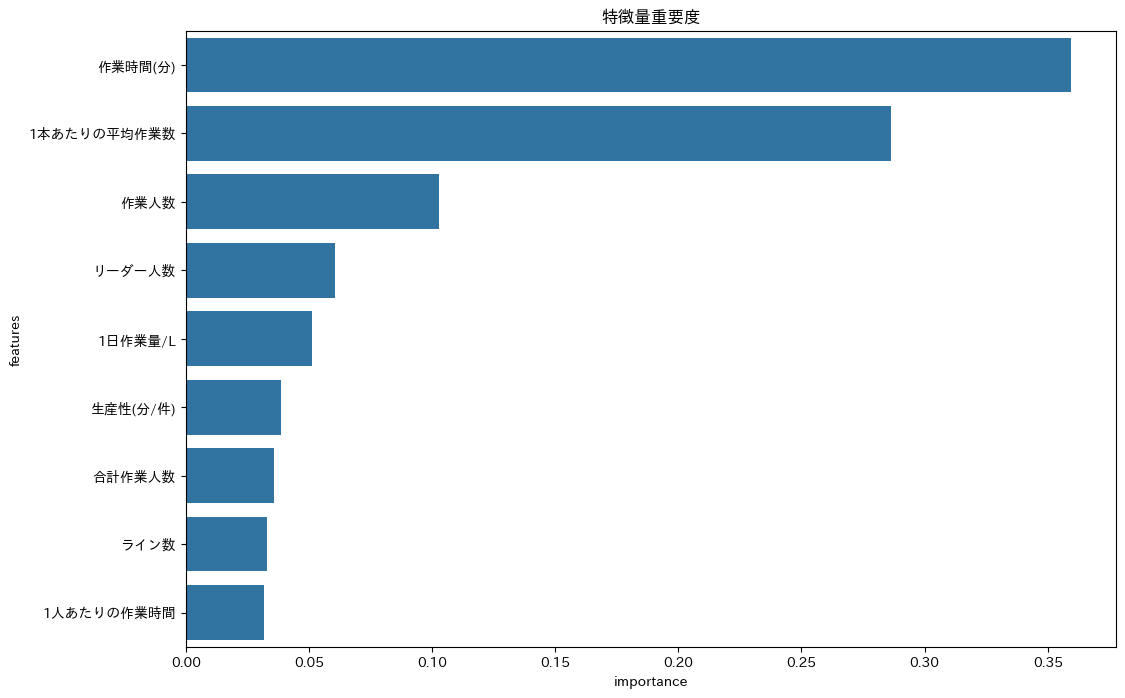

In [ ]:
# 特徴量重要度を可視化
%pip install matplotlib seaborn japanize-matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()